<a href="https://colab.research.google.com/github/jonatanriq/oceanografia/blob/main/copernicus_marine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size='5'>Nesse notebook vou acessar a base de dados marítimos do Copernicus </font>

O manual pra visuzalização dos dados oceanicos do copernicus ta [aqui](https://marine.copernicus.eu/services/user-learning-services/visualizing-global-wave-product-america-continent) e é só baixar o notebook fornecidos por eles. O único porém, é que está em inglês.


<font size='5'>
Fazendo o download do dado usando o motuclient
</font>

In [1]:
!pip install motuclient==1.8.4

  Created wheel for motuclient: filename=motuclient-1.8.4-py3-none-any.whl size=32877 sha256=553d16ba239370a4ea142e6e9d87d74ece5a676f667ab6d6b8e7fbdf6c03a3f3
  Stored in directory: /root/.cache/pip/wheels/1b/64/40/41bc3245f6d57b72afc3625434ff402eb10d04ec3dd034b600
Successfully built motuclient


Esse é o código que preciso inserir na célula abaixo.

Note que eu preciso colocar o diretório que será baixado o arquivo e também meu usuario e senha no copernicus!
```
!python -m motuclient --motu http://nrt.cmems-du.eu/motu-web/Motu --service-id GLOBAL_ANALYSIS_FORECAST_WAV_001_027-TDS --product-id global-analysis-forecast-wav-001-027 --longitude-min -120 --longitude-max -10 --latitude-min -80 --latitude-max 35 --date-min "2020-08-14 00:00:00" --date-max "2020-08-20 00:00:00" --variable VHM0 --variable VMDR --out-dir /content --out-name global-analysis-forecast-wav-001-027_ex1.nc --user <USERNAME> --pwd "<PASSWORD>"
```



In [ ]:
!python -m motuclient --motu http://nrt.cmems-du.eu/motu-web/Motu --service-id GLOBAL_ANALYSIS_FORECAST_WAV_001_027-TDS --product-id global-analysis-forecast-wav-001-027 --longitude-min -60 --longitude-max 0 --latitude-min -60 --latitude-max 0 --date-min "2020-08-14 00:00:00" --date-max "2020-08-20 00:00:00" --variable VHM0 --variable VMDR --out-dir /content --out-name global-analysis-forecast-wav-001-027_ex1.nc --user jnascimento --pwd "Ant0nia2108"

Depois de baixado, vou usar o *xarray* pra criar um dataset!

In [3]:
import os
for filename in os.listdir('/content'):
    if filename.endswith(".nc"):
        print(filename)

global-analysis-forecast-wav-001-027_ex1.nc


In [4]:
import xarray as xr

dados = xr.open_dataset('/content/global-analysis-forecast-wav-001-027_ex1.nc')

Verificando a versão do python...

In [5]:
!python --version

Python 3.7.12


Retiro os avisos

In [6]:
import warnings
warnings.filterwarnings('ignore')

Instalo o [Cartopy](https://scitools.org.uk/cartopy/docs/latest/)

Dou os imports necessários

In [7]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime

In [8]:
wav_ds = xr.open_dataset('/content/global-analysis-forecast-wav-001-027_ex1.nc')

In [ ]:
wav_ds

In [10]:
%%capture
# Nessa primeira etapa, o código atualiza os pacotes contidos na máquina.
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list
!apt-get update

# Instalando o cartopy e removendo o shapely
!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

# Reinstalando o shapely e o cartopy, nas versões adequadas
!pip install --no-binary shapely shapely --force

!pip install --no-binary cartopy cartopy==0.17.0
# Instalando o ProPlot
!pip install proplot

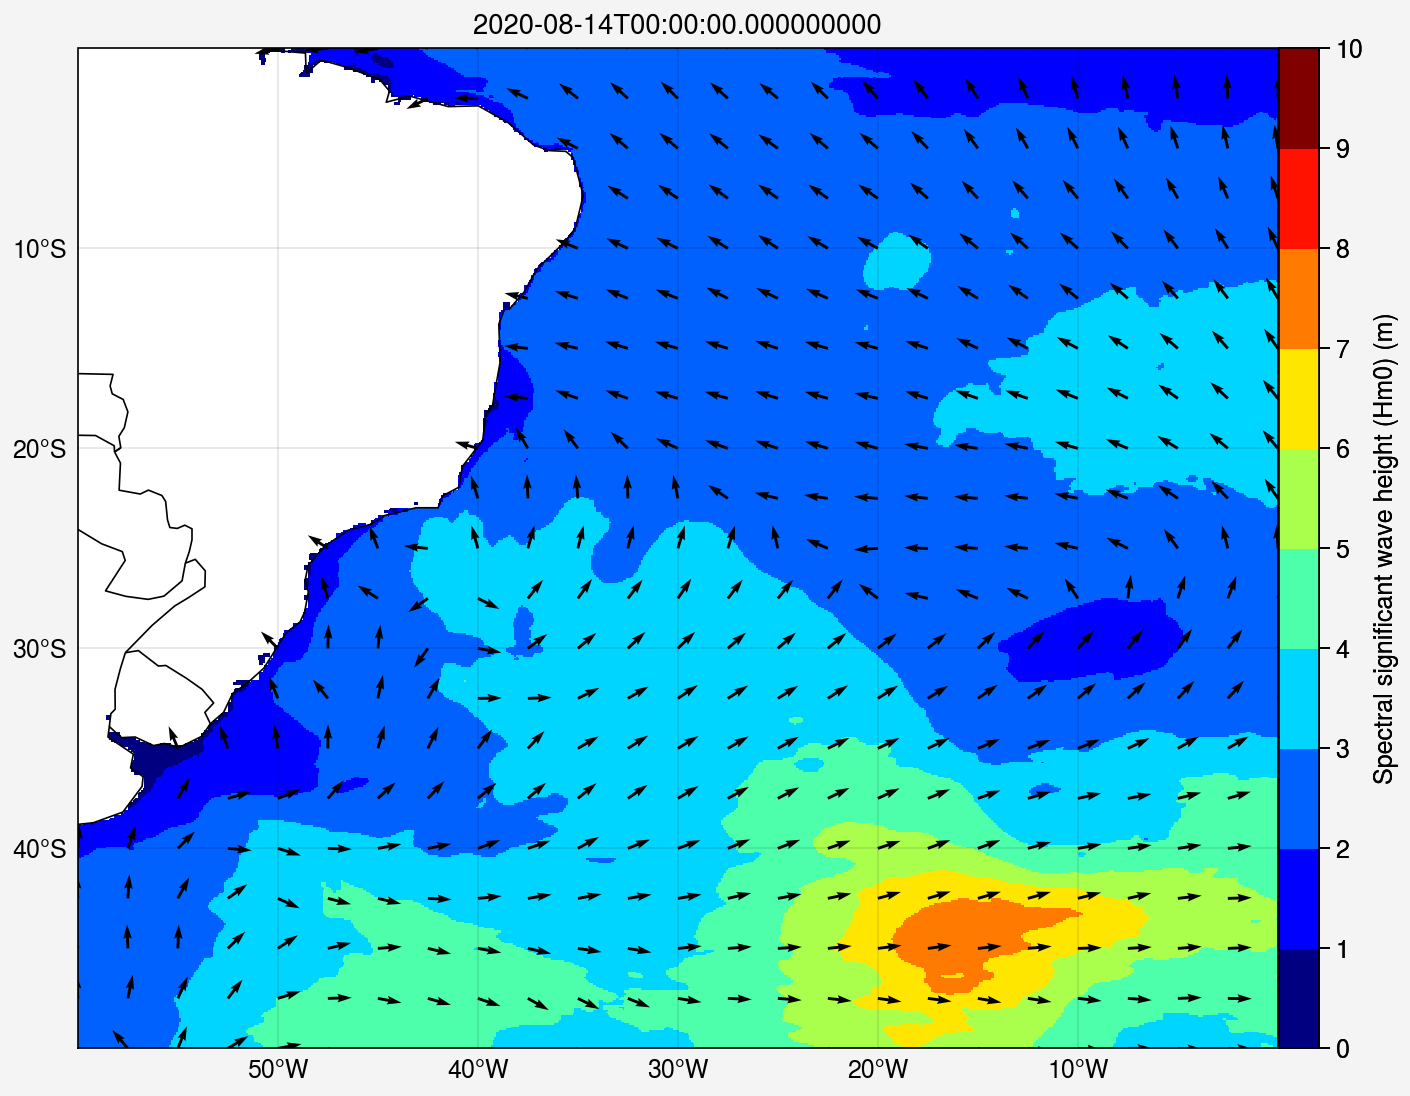

In [12]:
import proplot as plot

fig, ax = plot.subplots(axheight=5, tight=True,proj='pcarree') # crio o subplot, e o eixo x tenha 5 de tamanho, e a projeção é plate carree

# plot
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=10, lonlines=10, # definindo o grid de coordenadas
          latlim=(0, -50), lonlim=(0,-60), # definindo os limites do mapa
          title=f'{wav_ds.isel(time=0).time.values}')

skip_points = 30
res_scale = 1
min_value, max_value = 0, 10

im = ax.pcolor(wav_ds['longitude'].data[::res_scale], wav_ds['latitude'].data[::res_scale],
               wav_ds['VHM0'].isel(time=0).squeeze()[::res_scale,::res_scale],
               vmin=min_value,vmax=max_value,
               cmap='jet')


vect = ax.quiver(wav_ds['longitude'].data[::skip_points],wav_ds['latitude'].data[::skip_points],
                         -np.sin(np.pi/180*(wav_ds['VMDR'].isel(time=0).squeeze().data[::skip_points,::skip_points])),
                         -np.cos(np.pi/180*(wav_ds['VMDR'].isel(time=0).squeeze().data[::skip_points,::skip_points])),scale=50)
cbar =fig.colorbar(im,ax=ax,fraction=0.03, pad=0.04)    
plt.savefig(np.datetime_as_string(wav_ds.isel(time=0).time.values,unit='h')+'.png')